In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
dataDir='/media/greghovhannisyan/BackupData1/mscoco'
dataType='train2017'
annFile='%s/annotations/instances/instances_%s.json'%(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=15.62s)
creating index...
index created!


In [6]:
print(len(coco.loadCats(coco.getCatIds())))

80


In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('\n\n', ''.join(nms))



 personbicyclecarmotorcycleairplanebustraintruckboattraffic lightfire hydrantstop signparking meterbenchbirdcatdoghorsesheepcowelephantbearzebragiraffebackpackumbrellahandbagtiesuitcasefrisbeeskissnowboardsports ballkitebaseball batbaseball gloveskateboardsurfboardtennis racketbottlewine glasscupforkknifespoonbowlbananaapplesandwichorangebroccolicarrothot dogpizzadonutcakechaircouchpotted plantbeddining tabletoilettvlaptopmouseremotekeyboardcell phonemicrowaveoventoastersinkrefrigeratorbookclockvasescissorsteddy bearhair driertoothbrush


In [8]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n\n', ' '.join(nms))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n', ' '.join(nms))

COCO categories: 

 person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
 animal food person indoor appliance kitchen electronic vehicle accessory furniture outdoor sports


In [9]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [1]:
img['id']

NameError: name 'img' is not defined

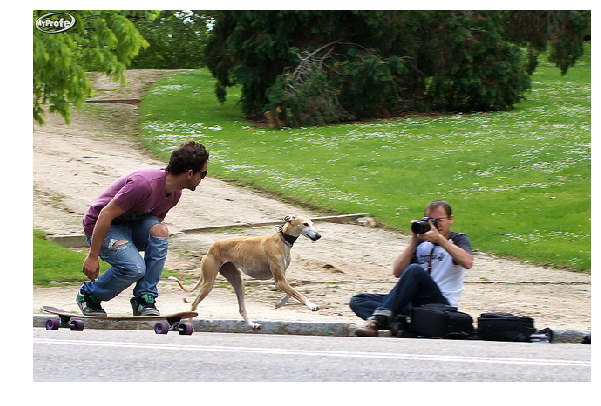

In [11]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
img_folder = '/images/train2017/'
I = io.imread(dataDir + img_folder + '000000' + str(img['id']) + '.jpg')
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

536244
[6368, 428131, 490659, 641076]
[{'iscrowd': 0, 'area': 8368.165300000002, 'image_id': 536244, 'id': 6368, 'bbox': [154.05, 232.22, 179.0, 135.98], 'category_id': 18, 'segmentation': [[158.35, 305.37, 174.7, 314.84, 179.87, 320.0, 184.17, 318.28, 192.78, 306.23, 194.5, 287.3, 199.66, 274.39, 214.29, 264.06, 231.5, 259.76, 255.6, 257.18, 268.51, 258.04, 277.98, 255.46, 289.16, 241.69, 290.88, 232.22, 300.35, 232.22, 312.4, 234.8, 327.03, 252.87, 333.05, 260.62, 319.28, 268.37, 307.24, 258.9, 298.63, 274.39, 290.88, 305.37, 309.82, 326.03, 321.01, 337.21, 324.45, 345.82, 318.42, 345.82, 304.65, 333.77, 297.77, 330.33, 292.61, 337.21, 281.42, 342.38, 275.39, 337.21, 283.14, 331.19, 292.61, 323.44, 282.28, 320.0, 275.39, 313.98, 269.37, 311.4, 257.32, 309.67, 245.27, 305.37, 236.67, 300.21, 243.55, 316.56, 246.13, 326.89, 244.41, 338.94, 251.3, 348.4, 259.04, 359.59, 263.35, 366.47, 249.58, 368.2, 240.97, 359.59, 234.95, 350.12, 234.08, 335.49, 232.36, 324.31, 224.62, 316.56, 219.45,

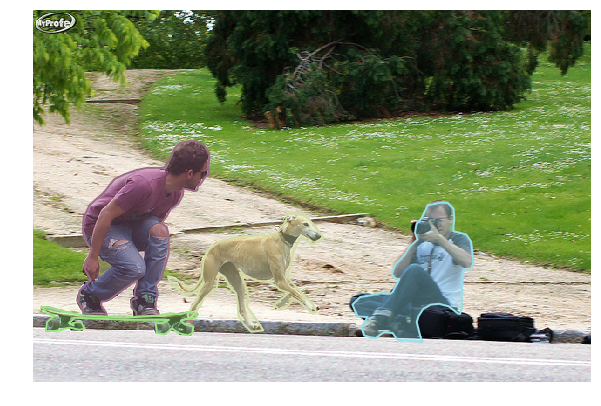

In [12]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
print(img['id'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
#[print(val) for val in item for item in anns]
# print(len(anns))
# for item in anns:
#     print(item['category_id'], item['bbox'], item['segmentation'])
    
#for item in anns:
#    for val in item:
#        print(val)

coco.showAnns(anns)
print(anns)

for item in anns:
    print(item['id'])
    print(type(item['bbox']))

[154.05, 232.22, 179.0, 135.98]


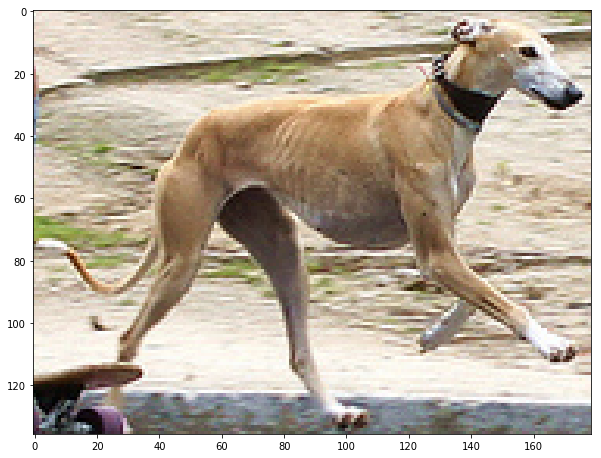

In [24]:
## Take out the bounding boxes into their own images.
from PIL import Image

p_img = Image.open(dataDir + img_folder + '000000' + str(img['id']) + '.jpg')


bbox = [154.05, 232.22, 179.0, 135.98]
print(bbox)
x1 = int(bbox[0])
x2 = int(bbox[0] + bbox[2])
y1 = int(bbox[1])
y2 = int(bbox[1] + bbox[3])

#(left line, top line )
#crop_img = p_img.crop((x1, 100, 150, 300))
#crop_img.save('test.jpg')
#print(crop_img.size)
#crop_img.show()
#print(I.size)

plt.imshow(I[y1:y2,x1:x2])

In [10]:
# initialize COCO api for person keypoints annotations
annFile = '%s/annotations/person_keypoints_%s.json'%(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=13.65s)
creating index...
index created!


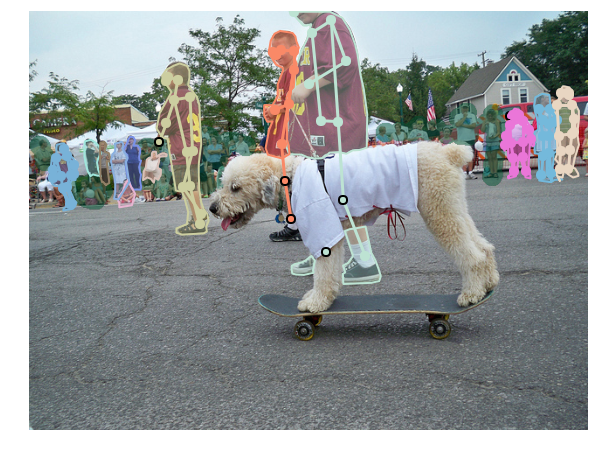

In [11]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [41]:
# initialize COCO api for caption annotations
annFile = '%s/annotations/captions_%s.json'%(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.39s)
creating index...
index created!


A girl riding a skateboard and being towed by a small dog.
a person on a skate board walks a dog at the same time 
A girl on a skateboard walking her dog.
A person skateboards while holding a dog on a leash.
Lady on roller blades walking her dog on a leash.


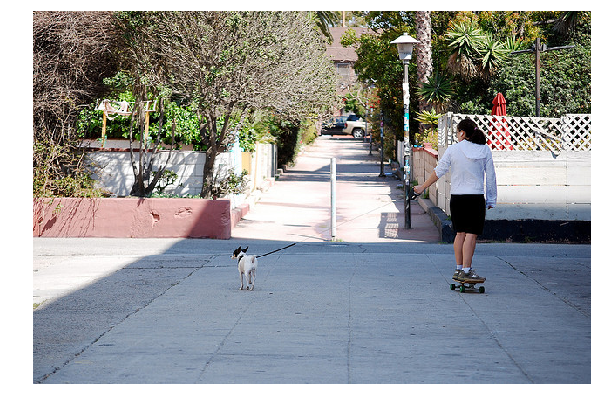

In [42]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off')
plt.show()